<a href="https://colab.research.google.com/github/muajnstu/DSK-Chain-to-predict-diabeties-/blob/main/Evaluate_existing_classifiers_on_cleaned_data_ipynb.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Evaluate Existing Classifiers on Cleaned data

In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
#from sklearn.metrics import (accuracy_score, confusion_matrix, roc_auc_score, f1_score)
from sklearn.metrics import (confusion_matrix, accuracy_score, f1_score, roc_auc_score, recall_score, precision_score)
from sklearn.neighbors import KNeighborsClassifier
from sklearn import neighbors
from imblearn.over_sampling import SMOTE
from sklearn.base import BaseEstimator, ClassifierMixin
import numpy as np
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import (
    RandomForestClassifier,
    GradientBoostingClassifier,
    AdaBoostClassifier,
    ExtraTreesClassifier,
    BaggingClassifier
)
from sklearn.linear_model import (
    LogisticRegression,
    RidgeClassifier,
    Perceptron,
    SGDClassifier,
    PassiveAggressiveClassifier
)
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis, QuadraticDiscriminantAnalysis
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from sklearn.model_selection import StratifiedKFold
import matplotlib.pyplot as plt

In [ ]:
df=pd.read_csv('https://raw.githubusercontent.com/muajnstu/DSK-Chain-to-predict-diabeties-/refs/heads/main/Cleaned%20data%20after%20removal%20of%20duplicate%20values.csv')
X = df.drop(columns=['Outcome'])
y = df['Outcome']

#print("Class distribution:\n", y.value_counts())
# --- Handle Imbalanced Data ---

#smote = SMOTE(random_state=42)
#X_resampled, y_resampled = smote.fit_resample(X, y)

#print("Balanced class distribution:\n", pd.Series(y_resampled).value_counts())
# --- Train/Test Split ---

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=46, stratify=y)


In [ ]:
# metrics function
def print_metrics(y_true, y_pred, y_prob=None):
    cm = confusion_matrix(y_true, y_pred)
    accuracy = accuracy_score(y_true, y_pred)
    num_classes = cm.shape[0]

    if num_classes == 2:
        TN, FP, FN, TP = cm.ravel()
        specificity = TN / (TN + FP) if (TN + FP) > 0 else 0
        sensitivity = TP / (TP + FN) if (TP + FN) > 0 else 0
        gmean = np.sqrt(specificity * sensitivity)
        type1 = FP / (FP + TN) if (FP + TN) > 0 else 0
        type2 = FN / (TP + FN) if (TP + FN) > 0 else 0
        fmeasure = f1_score(y_true, y_pred, pos_label=1)
        auc = 0
        if y_prob is not None and hasattr(y_prob, "shape") and y_prob.shape[1] > 1:
            try:
                auc = roc_auc_score(y_true, y_prob[:, 1])
            except Exception:
                auc = 0
    else:
        TP = np.diag(cm)
        FP = np.sum(cm, axis=0) - TP
        FN = np.sum(cm, axis=1) - TP
        TN = np.sum(cm) - (FP + FN + TP)
        specificity = np.mean([TN[i] / (TN[i] + FP[i]) if (TN[i] + FP[i]) > 0 else 0 for i in range(num_classes)])
        sensitivity = np.mean([TP[i] / (TP[i] + FN[i]) if (TP[i] + FN[i]) > 0 else 0 for i in range(num_classes)])
        gmean = np.sqrt(specificity * sensitivity)
        type1 = np.mean([FP[i] / (FP[i] + TN[i]) if (FP[i] + TN[i]) > 0 else 0 for i in range(num_classes)])
        type2 = np.mean([FN[i] / (TP[i] + FN[i]) if (TP[i] + FN[i]) > 0 else 0 for i in range(num_classes)])
        fmeasure = f1_score(y_true, y_pred, average='macro')
        auc = 0
        if y_prob is not None and hasattr(y_prob, "shape") and y_prob.shape[1] > 1:
            try:
                auc = roc_auc_score(y_true, y_prob, multi_class='ovr', average='macro')
            except Exception:
                auc = 0

    print(f"Accuracy      : {accuracy:.4f}")
    print(f"Sensitivity   : {sensitivity:.4f}")
    print(f"Specificity   : {specificity:.4f}")
    print(f"G-Mean        : {gmean:.4f}")
    print(f"Type I Error  : {type1:.4f}")
    print(f"Type II Error : {type2:.4f}")
    print(f"F1 Score      : {fmeasure:.4f}")
    print(f"AUROC         : {auc:.4f}")

# Universal runner for any model
def run_model(name, model, X_train, X_test, y_train, y_test):
    print(f"\n===== Running {name} =====")
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    try:
        y_prob = model.predict_proba(X_test)
    except AttributeError:
        y_prob = None
    print_metrics(y_test, y_pred, y_prob)

#  classical ML models
ml_models = {
    "RandomForest": RandomForestClassifier(random_state=42),
    "ExtraTrees": ExtraTreesClassifier(random_state=42),
    "Bagging": BaggingClassifier(random_state=42),
    "GradientBoosting": GradientBoostingClassifier(random_state=42),
    #"AdaBoost": AdaBoostClassifier(random_state=42),
    #"LogisticRegression": LogisticRegression(max_iter=1000, random_state=42),
    #"RidgeClassifier": RidgeClassifier(random_state=42),
    "DecisionTree": DecisionTreeClassifier(random_state=42),
    "NaiveBayes": GaussianNB(),
    #"Perceptron": Perceptron(random_state=42),
    #"SGDClassifier": SGDClassifier(random_state=42),
    #"KNN": KNeighborsClassifier(n_neighbors=3),
    #"PassiveAggressive": PassiveAggressiveClassifier(random_state=42),
    #"LinearSVM": SVC(kernel='linear', probability=True, random_state=42),
    #"RBFSVM": SVC(kernel='rbf', probability=True, random_state=42),
    "LDA": LinearDiscriminantAnalysis(),
    "QDA": QuadraticDiscriminantAnalysis(),
    "XGBoost": XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42),
    "LightGBM": LGBMClassifier(verbosity=-1, random_state=42)
}


# Run all models in a loop
for name, model in ml_models.items():
    run_model(name, model, X_train, X_test, y_train, y_test)


===== Running RandomForest =====
Accuracy      : 0.7666
Sensitivity   : 0.1220
Specificity   : 0.9131
G-Mean        : 0.3337
Type I Error  : 0.0869
Type II Error : 0.8780
F1 Score      : 0.1622
AUROC         : 0.5786

===== Running ExtraTrees =====
Accuracy      : 0.7605
Sensitivity   : 0.1504
Specificity   : 0.8993
G-Mean        : 0.3678
Type I Error  : 0.1007
Type II Error : 0.8496
F1 Score      : 0.1888
AUROC         : 0.5068

===== Running Bagging =====
Accuracy      : 0.7440
Sensitivity   : 0.1463
Specificity   : 0.8799
G-Mean        : 0.3588
Type I Error  : 0.1201
Type II Error : 0.8537
F1 Score      : 0.1748
AUROC         : 0.5513

===== Running GradientBoosting =====
Accuracy      : 0.8268
Sensitivity   : 0.0772
Specificity   : 0.9972
G-Mean        : 0.2775
Type I Error  : 0.0028
Type II Error : 0.9228
F1 Score      : 0.1418
AUROC         : 0.6883

===== Running DecisionTree =====
Accuracy      : 0.7026
Sensitivity   : 0.1748
Specificity   : 0.8226
G-Mean        : 0.3792
Type 

/usr/local/lib/python3.11/dist-packages/xgboost/training.py:183: UserWarning: [19:50:03] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


Accuracy      : 0.8163
Sensitivity   : 0.1382
Specificity   : 0.9704
G-Mean        : 0.3662
Type I Error  : 0.0296
Type II Error : 0.8618
F1 Score      : 0.2179
AUROC         : 0.6875

===== Running LightGBM =====
Accuracy      : 0.8200
Sensitivity   : 0.1220
Specificity   : 0.9787
G-Mean        : 0.3455
Type I Error  : 0.0213
Type II Error : 0.8780
F1 Score      : 0.2007
AUROC         : 0.6872


# Cross-Fold Result

In [ ]:
all_results = []
skf = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)
# Use the existing ml_models dictionary
# ml_models = get_ml_models(X)

for name, model_proto in ml_models.items():
    model_results = []
    print(f"\n==== {name} ====")

    for fold, (train_idx, test_idx) in enumerate(skf.split(X, y)):
        X_train_cv, X_test_cv = X.iloc[train_idx], X.iloc[test_idx]
        y_train_cv, y_test_cv = y.iloc[train_idx], y.iloc[test_idx]

        # Create a new instance of the model for each fold
        model = model_proto

        model.fit(X_train_cv, y_train_cv)
        y_pred = model.predict(X_test_cv)
        y_prob = model.predict_proba(X_test_cv) if hasattr(model, "predict_proba") else None

        # Collect metrics directly from the print_metrics function output or define them here
        # For now, I'll modify print_metrics to return a dictionary.
        # As a temporary fix, I will manually calculate some metrics here
        cm = confusion_matrix(y_test_cv, y_pred)
        accuracy = accuracy_score(y_test_cv, y_pred)
        fmeasure = f1_score(y_test_cv, y_pred, average='macro')
        auc = roc_auc_score(y_test_cv, y_prob[:, 1], multi_class='ovr', average='macro') if y_prob is not None and y_prob.shape[1] > 1 else 0


        metrics = {
            "Accuracy": accuracy,
            "F1 Score": fmeasure,
            "AUROC": auc,
            "fold": fold + 1,
            "models": name
        }


        #  Only one fold-wise print
        print(f"Fold {fold+1}: " +
              ", ".join([f"{k}: {v:.4f}" for k, v in metrics.items() if k not in ["fold", "models"]]))

    all_results.extend(model_results)


==== RandomForest ====
Fold 1: Accuracy: 0.7349, F1 Score: 0.4903, AUROC: 0.5540
Fold 2: Accuracy: 0.7620, F1 Score: 0.5061, AUROC: 0.5713
Fold 3: Accuracy: 0.7620, F1 Score: 0.5190, AUROC: 0.5572
Fold 4: Accuracy: 0.7515, F1 Score: 0.4911, AUROC: 0.5750
Fold 5: Accuracy: 0.7560, F1 Score: 0.5025, AUROC: 0.5505
Fold 6: Accuracy: 0.7651, F1 Score: 0.5123, AUROC: 0.5492
Fold 7: Accuracy: 0.7677, F1 Score: 0.5185, AUROC: 0.5881
Fold 8: Accuracy: 0.7557, F1 Score: 0.4980, AUROC: 0.6168
Fold 9: Accuracy: 0.7692, F1 Score: 0.5194, AUROC: 0.5342
Fold 10: Accuracy: 0.7526, F1 Score: 0.4962, AUROC: 0.5695

==== ExtraTrees ====
Fold 1: Accuracy: 0.7380, F1 Score: 0.4961, AUROC: 0.4648
Fold 2: Accuracy: 0.7425, F1 Score: 0.4861, AUROC: 0.4415
Fold 3: Accuracy: 0.7410, F1 Score: 0.5098, AUROC: 0.4446
Fold 4: Accuracy: 0.7364, F1 Score: 0.4649, AUROC: 0.4958
Fold 5: Accuracy: 0.7440, F1 Score: 0.5037, AUROC: 0.4407
Fold 6: Accuracy: 0.7590, F1 Score: 0.5212, AUROC: 0.4630
Fold 7: Accuracy: 0.7602,

/usr/local/lib/python3.11/dist-packages/sklearn/discriminant_analysis.py:1024: LinAlgWarning: The covariance matrix of class 1 is not full rank. Increasing the value of parameter `reg_param` might help reducing the collinearity.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/xgboost/training.py:183: UserWarning: [19:50:38] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


Fold 9: Accuracy: 0.2293, F1 Score: 0.2173, AUROC: 0.5308
Fold 10: Accuracy: 0.2549, F1 Score: 0.2490, AUROC: 0.5966

==== XGBoost ====
Fold 1: Accuracy: 0.8012, F1 Score: 0.5259, AUROC: 0.6964
Fold 2: Accuracy: 0.8102, F1 Score: 0.5032, AUROC: 0.7081


/usr/local/lib/python3.11/dist-packages/xgboost/training.py:183: UserWarning: [19:50:38] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/usr/local/lib/python3.11/dist-packages/xgboost/training.py:183: UserWarning: [19:50:38] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


Fold 3: Accuracy: 0.8163, F1 Score: 0.5306, AUROC: 0.6544
Fold 4: Accuracy: 0.8057, F1 Score: 0.5066, AUROC: 0.6989


/usr/local/lib/python3.11/dist-packages/xgboost/training.py:183: UserWarning: [19:50:38] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/usr/local/lib/python3.11/dist-packages/xgboost/training.py:183: UserWarning: [19:50:38] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


Fold 5: Accuracy: 0.8072, F1 Score: 0.5133, AUROC: 0.6420
Fold 6: Accuracy: 0.8178, F1 Score: 0.5479, AUROC: 0.7001


/usr/local/lib/python3.11/dist-packages/xgboost/training.py:183: UserWarning: [19:50:39] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/usr/local/lib/python3.11/dist-packages/xgboost/training.py:183: UserWarning: [19:50:39] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


Fold 7: Accuracy: 0.8054, F1 Score: 0.5006, AUROC: 0.6925
Fold 8: Accuracy: 0.8130, F1 Score: 0.5393, AUROC: 0.7057


/usr/local/lib/python3.11/dist-packages/xgboost/training.py:183: UserWarning: [19:50:39] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/usr/local/lib/python3.11/dist-packages/xgboost/training.py:183: UserWarning: [19:50:39] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


Fold 9: Accuracy: 0.8160, F1 Score: 0.5248, AUROC: 0.6441
Fold 10: Accuracy: 0.8130, F1 Score: 0.5284, AUROC: 0.6869

==== LightGBM ====


/usr/local/lib/python3.11/dist-packages/xgboost/training.py:183: UserWarning: [19:50:39] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


Fold 1: Accuracy: 0.8193, F1 Score: 0.5383, AUROC: 0.6935
Fold 2: Accuracy: 0.8102, F1 Score: 0.4839, AUROC: 0.7050
Fold 3: Accuracy: 0.8208, F1 Score: 0.5279, AUROC: 0.6516
Fold 4: Accuracy: 0.8163, F1 Score: 0.5190, AUROC: 0.7019
Fold 5: Accuracy: 0.8148, F1 Score: 0.5120, AUROC: 0.6475
Fold 6: Accuracy: 0.8223, F1 Score: 0.5460, AUROC: 0.7012
Fold 7: Accuracy: 0.8220, F1 Score: 0.5166, AUROC: 0.6882
Fold 8: Accuracy: 0.8160, F1 Score: 0.5361, AUROC: 0.7125
Fold 9: Accuracy: 0.8084, F1 Score: 0.5083, AUROC: 0.6366
Fold 10: Accuracy: 0.8235, F1 Score: 0.5524, AUROC: 0.6779


# AU-ROC plot

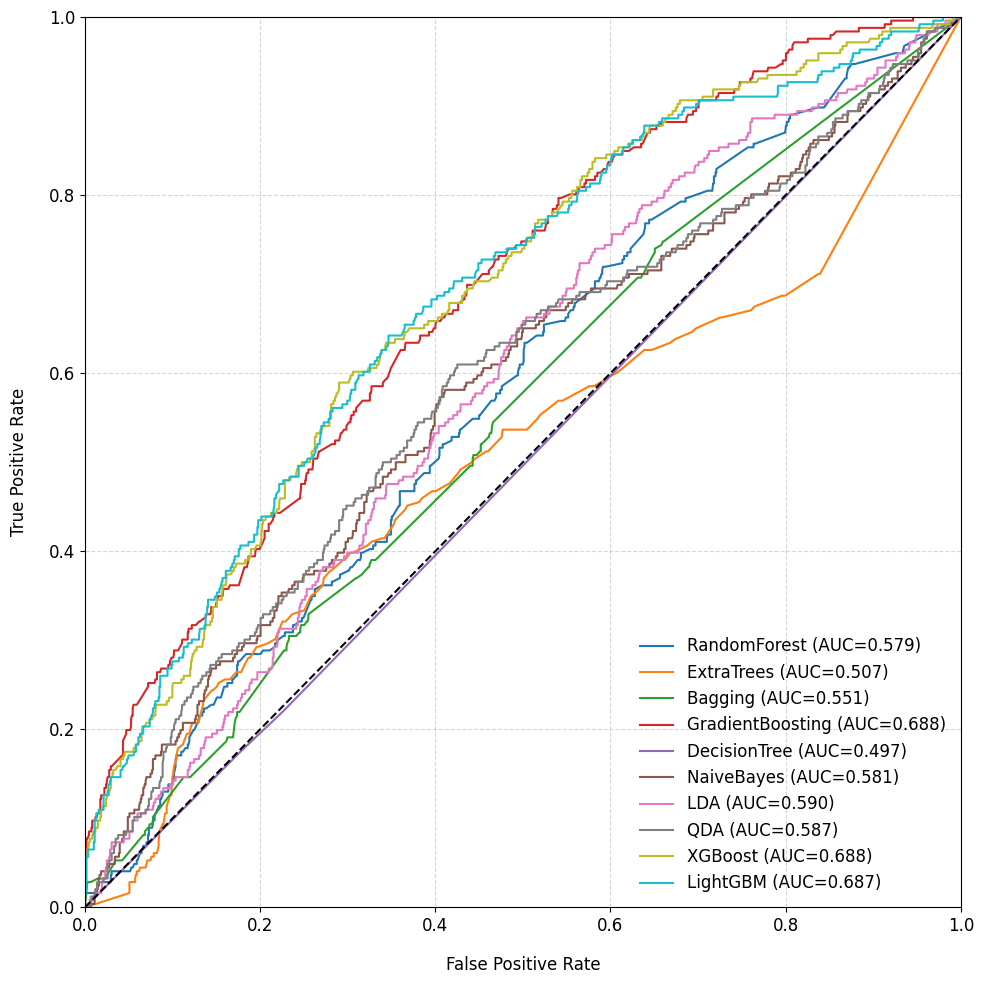

In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize

plt.rcParams.update({
    'font.size': 12,
    'axes.labelsize': 12,
    'xtick.labelsize': 12,
    'ytick.labelsize': 12,
    'legend.fontsize': 12
})


plt.figure(figsize=(10, 10))
for name, clf in ml_models.items():
    # Try predict_proba
    y_score = None
    if hasattr(clf, "predict_proba"):
        try:
            y_score = clf.predict_proba(X_test)[:, 1]
        except Exception:
            y_score = None
    # Fallback to decision_function
    if y_score is None and hasattr(clf, "decision_function"):
        try:
            y_score = clf.decision_function(X_test)
            # For binary, decision_function is fine
        except Exception:
            y_score = None
    # Plot only if we have scores
    if y_score is not None:
        fpr, tpr, _ = roc_curve(y_test, y_score)
        roc_auc = auc(fpr, tpr)
        plt.plot(fpr, tpr, label=f'{name} (AUC={roc_auc:.3f})')
    else:
        print(f"{name} does not support probability or decision scores. Can't plot ROC.")

plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate', labelpad=15)
plt.ylabel('True Positive Rate', labelpad=15)
plt.legend(loc="lower right", frameon=False, ncol=1)
plt.xlim([0.0, 1.0])  # Set x-axis limits
plt.ylim([0.0, 1.0])  # Set y-axis limits
plt.grid(True, linestyle="--", alpha=0.5)
plt.tight_layout()
plt.show()